In [61]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [62]:
#importing dataset
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
#Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
#Dropping irrelevent columns
df = df.drop(['Name', 'Cabin', 'Embarked', 'Ticket'], axis=1)

In [65]:
#Converting categorical columns to Integer Columns using label encoding
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])

In [66]:
#Converting Age column to integer and filling missing values
df.Age = df.Age.fillna(30)
df['Age'] = df.Age.astype(int)

In [67]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

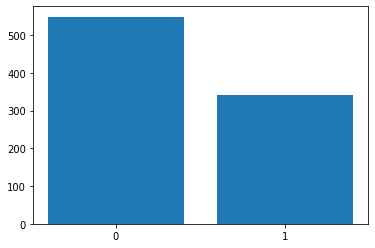

In [68]:
##Data Analysis
plt.bar(df.Survived.unique(), df.Survived.value_counts())
plt.xticks([0,1])
plt.show()

In [69]:
#Separating dependent and independent variables
X = df.drop(['Survived'],axis=1)
y = df['Survived']
X.shape,y.shape

((891, 7), (891,))

In [70]:
#Splitting training and testing data
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size=0.2)

In [71]:
#Fitting the model
rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)
rf.score(Xtest,ytest)

0.8044692737430168

In [72]:
#Making Predictions and Evaluating results
ypred = rf.predict(Xtest)
confusion_matrix(ytest,ypred)

array([[101,  18],
       [ 17,  43]])